# CROP RECOMMENDATION SYSTEM

# Goal 🎯
**To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation**

In [135]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [136]:
PATH = '/content/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [137]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [138]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [139]:
df.size

17600

In [140]:
df.shape

(2200, 8)

In [141]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [142]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [143]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [144]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


### Seperating features and target label

In [145]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [146]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [147]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =42)
Xval, Xtest, Yval, Ytest = train_test_split(Xtest, Ytest, test_size=0.5, random_state=42)

In [148]:
# prompt: print the size of xtrain xval xtest ytrain yval ytest

print("Xtrain size:", Xtrain.shape)
print("Xval size:", Xval.shape)
print("Xtest size:", Xtest.shape)
print("Ytrain size:", Ytrain.shape)
print("Yval size:", Yval.shape)
print("Ytest size:", Ytest.shape)

Xtrain size: (1540, 7)
Xval size: (330, 7)
Xtest size: (330, 7)
Ytrain size: (1540,)
Yval size: (330,)
Ytest size: (330,)


# Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xval)
x = metrics.accuracy_score(Yval, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Yval,predicted_values))

DecisionTrees's Accuracy is:  86.66666666666667
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        15
   blackgram       0.67      1.00      0.80        16
    chickpea       1.00      0.92      0.96        13
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        11
        jute       0.68      1.00      0.81        17
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.48      1.00      0.65        11
       maize       1.00      1.00      1.00        10
       mango       1.00      1.00      1.00        11
   mothbeans       0.00      0.00      0.00        20
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        13
      orange       1.00      1.00

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=20)

In [152]:
score

array([0.94545455, 0.90909091, 0.94545455, 0.94545455, 0.91818182,
       0.92727273, 0.93636364, 0.91818182, 0.9       , 0.92727273,
       0.91818182, 0.92727273, 0.9       , 0.93636364, 0.92727273,
       0.91818182, 0.96363636, 0.91818182, 0.88181818, 0.93636364])

### Saving trained Decision Tree model

In [153]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xval)

x = metrics.accuracy_score(Yval, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Yval,predicted_values))

Logistic Regression's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       0.94      1.00      0.97        15
   blackgram       0.78      0.88      0.82        16
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       0.88      0.93      0.90        15
      grapes       1.00      1.00      1.00        11
        jute       0.80      0.94      0.86        17
 kidneybeans       1.00      0.93      0.96        14
      lentil       0.90      0.82      0.86        11
       maize       0.86      0.60      0.71        10
       mango       0.92      1.00      0.96        11
   mothbeans       0.89      0.85      0.87        20
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        13
      orange       1.00   

In [155]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [156]:
import pickle

LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xval)

x = metrics.accuracy_score(Yval, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Yval,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        11
        jute       0.85      1.00      0.92        17
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        10
       mango       1.00      1.00      1.00        11
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        13
      orange       1.00      1.00      1.00 

In [158]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [159]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [160]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
Ytrain_encoded = le.fit_transform(Ytrain)

XB = xgb.XGBClassifier()

# Use the encoded target variable for training
XB.fit(Xtrain, Ytrain_encoded)

# Make predictions (note: predicted values will be encoded)
predicted_values_encoded = XB.predict(Xval)

# Inverse transform to get original labels
predicted_values = le.inverse_transform(predicted_values_encoded)

x = metrics.accuracy_score(Yval, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Yval,predicted_values))

XGBoost's Accuracy is:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        11
        jute       0.81      1.00      0.89        17
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        11
       maize       1.00      1.00      1.00        10
       mango       0.92      1.00      0.96        11
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        13
      orange       1.00      1.00     

In [161]:
# Cross validation score (XGBoost)
score = cross_val_score(XB, features, le.transform(target), cv=5)  # Change here
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

### Saving trained XGBoost model

In [162]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

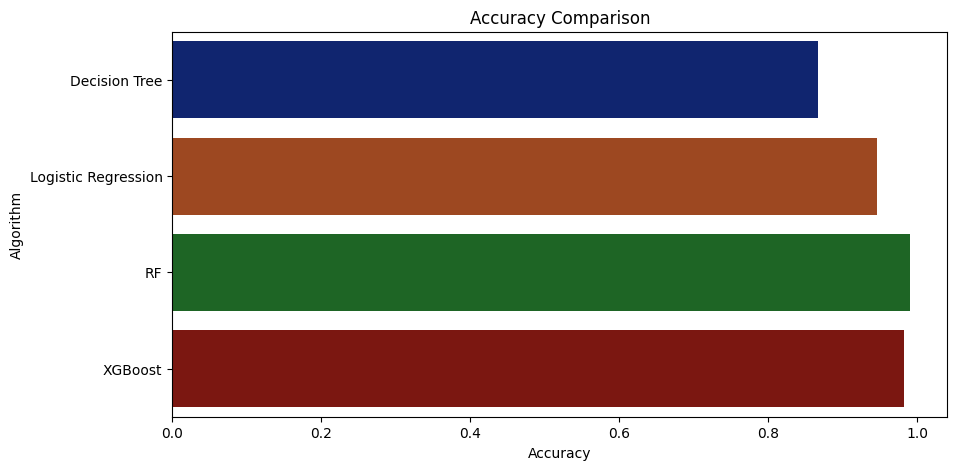

In [163]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [164]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8666666666666667
Logistic Regression --> 0.9454545454545454
RF --> 0.990909090909091
XGBoost --> 0.9818181818181818


## Making a prediction

In [165]:


# Decision Tree
predicted_values_DT = DecisionTree.predict(Xtest)
accuracy_DT = metrics.accuracy_score(Ytest, predicted_values_DT)
print("Decision Tree's Final Accuracy on Test Set:", accuracy_DT)

# Logistic Regression
predicted_values_LR = LogReg.predict(Xtest)
accuracy_LR = metrics.accuracy_score(Ytest, predicted_values_LR)
print("Logistic Regression's Final Accuracy on Test Set:", accuracy_LR)

# Random Forest
predicted_values_RF = RF.predict(Xtest)
accuracy_RF = metrics.accuracy_score(Ytest, predicted_values_RF)
print("Random Forest's Final Accuracy on Test Set:", accuracy_RF)

# XGBoost
predicted_values_encoded_XB = XB.predict(Xtest)
predicted_values_XB = le.inverse_transform(predicted_values_encoded_XB)
accuracy_XB = metrics.accuracy_score(Ytest, predicted_values_XB)
print("XGBoost's Final Accuracy on Test Set:", accuracy_XB)

Decision Tree's Final Accuracy on Test Set: 0.8727272727272727
Logistic Regression's Final Accuracy on Test Set: 0.9454545454545454
Random Forest's Final Accuracy on Test Set: 0.9939393939393939
XGBoost's Final Accuracy on Test Set: 0.9818181818181818


In [179]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [167]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
